# MadMiner particle physics tutorial

# Part 2a: Analyzing events at parton level

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In this second part of the tutorial, we'll generate events and extract the observables and weights from them. You have two options: In this notebook we'll do this at parton level, in the alternative part 2b we use Delphes.

## 0. Preparations

Before you execute this notebook, make sure you have a running installation of MadGraph.

In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [21]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [22]:
from madminer import MadMiner, LHEReader, combine_and_shuffle, plot_distributions

Please enter here the path to your MG5 root directory:

In [23]:
mg_dir = '/madminer/software/MG5_aMC_v2_6_7'

## 1. Generate events

Let's load our setup:

In [24]:
miner = MadMiner()
miner.load("data/setup_gw.h5")

17:40 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
17:40 madminer.core.madmin INFO    Found 1 parameters:
17:40 madminer.core.madmin INFO       CWWWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-20.0, 20.0))
17:40 madminer.core.madmin INFO    Found 10 benchmarks:
17:40 madminer.core.madmin INFO       morphing_basis_vector_0: CWWWL2 = -1.98e+01
17:40 madminer.core.madmin INFO       morphing_basis_vector_1: CWWWL2 = 2.23
17:40 madminer.core.madmin INFO       morphing_basis_vector_2: CWWWL2 = 16.83
17:40 madminer.core.madmin INFO       sm: CWWWL2 = 0.00e+00
17:40 madminer.core.madmin INFO       5: CWWWL2 = 0.72
17:40 madminer.core.madmin INFO       10: CWWWL2 = 1.44
17:40 madminer.core.madmin INFO       20: CWWWL2 = 2.87
17:40 madminer.core.madmin INFO       neg_5: CWWWL2 = -7.18e-01
17:40 madminer.core.madmin INFO       neg_10: CWWWL2 = -1.44e+00
17:40 madminer.core.madmin INFO       neg_20: CWWWL2 = -2.87e+00
17:40 madminer.core.madmin INFO  

In a next step, MadMiner starts MadGraph to generate events and calculate the weights. You can use `run()` or `run_multiple()`; the latter allows to generate different runs with different run cards and optimizing the phase space for different benchmark points. 

In either case, you have to provide paths to the process card, run card, param card (the entries corresponding to the parameters of interest will be automatically adapted), and an empty reweight card. Log files in the `log_directory` folder collect the MadGraph output and are important for debugging.

The `sample_benchmark` (or in the case of `run_all`, `sample_benchmarks`) option can be used to specify which benchmark should be used for sampling, i.e. for which benchmark point the phase space is optimized. If you just use one benchmark, reweighting to far-away points in parameter space can lead to large event weights and thus large statistical fluctuations. It is therefore often a good idea to combine a lot of events at the "reference hypothesis" (for us the SM) and smaller samples from other benchmarks that span the parameter space.

One slight annoyance is that MadGraph only supports Python 2. The `run()` and `run_multiple()` commands have a keyword `initial_command` that let you load a virtual environment in which `python` maps to Python 2 (which is what we do below). Alternatively / additionally you can set `python2_override=True`, which calls `python2.7` instead of `python` to start MadGraph.

In [25]:
miner.run(
    sample_benchmark='sm',
    mg_directory=mg_dir,
    mg_process_directory='./mg_processes/signal1',
    proc_card_file='cards/proc_card_signal.dat',
    param_card_template_file='cards/param_card_template.dat',
    run_card_file='cards/run_card_signal_large.dat',
    log_directory='logs/signal',
    initial_command="source activate python2"
)

17:40 madminer.utils.inter INFO    Generating MadGraph process folder from cards/proc_card_signal.dat at ./mg_processes/signal1
17:40 madminer.core.madmin INFO    Run 0
17:40 madminer.core.madmin INFO      Sampling from benchmark: sm
17:40 madminer.core.madmin INFO      Original run card:       cards/run_card_signal_large.dat
17:40 madminer.core.madmin INFO      Original Pythia8 card:   None
17:40 madminer.core.madmin INFO      Original config card:    None
17:40 madminer.core.madmin INFO      Copied run card:         madminer/cards/run_card_0.dat
17:40 madminer.core.madmin INFO      Copied Pythia8 card:     None
17:40 madminer.core.madmin INFO      Copied config card:      None
17:40 madminer.core.madmin INFO      Param card:              madminer/cards/param_card_0.dat
17:40 madminer.core.madmin INFO      Reweight card:           madminer/cards/reweight_card_0.dat
17:40 madminer.core.madmin INFO      Log file:                run_0.log
17:40 madminer.core.madmin INFO    Creating param

In [26]:
#additional_benchmarks = ['w', 'ww', 'neg_w', 'neg_ww']
additional_benchmarks = ['5', 'neg_5', '10', 'neg_10', '20', 'neg_20']

In [27]:
miner.run_multiple(
    sample_benchmarks=additional_benchmarks,
    mg_directory=mg_dir,
    mg_process_directory='./mg_processes/signal2',
    proc_card_file='cards/proc_card_signal.dat',
    param_card_template_file='cards/param_card_template.dat',
    run_card_files=['cards/run_card_signal_small.dat'],
    log_directory='logs/signal',
    initial_command="source activate python2"
)

17:50 madminer.utils.inter INFO    Generating MadGraph process folder from cards/proc_card_signal.dat at ./mg_processes/signal2
17:50 madminer.core.madmin INFO    Run 0
17:50 madminer.core.madmin INFO      Sampling from benchmark: 5
17:50 madminer.core.madmin INFO      Original run card:       cards/run_card_signal_small.dat
17:50 madminer.core.madmin INFO      Original Pythia8 card:   None
17:50 madminer.core.madmin INFO      Original config card:    None
17:50 madminer.core.madmin INFO      Copied run card:         madminer/cards/run_card_0.dat
17:50 madminer.core.madmin INFO      Copied Pythia8 card:     None
17:50 madminer.core.madmin INFO      Copied config card:      None
17:50 madminer.core.madmin INFO      Param card:              madminer/cards/param_card_0.dat
17:50 madminer.core.madmin INFO      Reweight card:           madminer/cards/reweight_card_0.dat
17:50 madminer.core.madmin INFO      Log file:                run_0.log
17:50 madminer.core.madmin INFO    Creating param 

This will take a moment -- time for a coffee break!

After running any event generation through MadMiner, you should check whether the run succeeded: are the usual output files there, do the log files show any error messages? MadMiner does not (yet) perform any explicit checks, and if something went wrong in the event generation, it will only notice later when trying to load the event files.

### Backgrounds

We can also easily add other processes like backgrounds. An important option is the `is_background` keyword, which should be used for processes that do *not* depend on the parameters theta. `is_background=True` will disable the reweighting and re-use the same weights for all cross sections.

To reduce the runtime of the notebook, the background part is commented out here. Feel free to activate it and let it run during a lunch break.

In [28]:
"""
miner.run(
    is_background=True,
    sample_benchmark='sm',
    mg_directory=mg_dir,
    mg_process_directory='./mg_processes/background',
    proc_card_file='cards/proc_card_background.dat',
    param_card_template_file='cards/param_card_template.dat',
    run_card_file='cards/run_card_background.dat',
    log_directory='logs/background',
)
"""

"\nminer.run(\n    is_background=True,\n    sample_benchmark='sm',\n    mg_directory=mg_dir,\n    mg_process_directory='./mg_processes/background',\n    proc_card_file='cards/proc_card_background.dat',\n    param_card_template_file='cards/param_card_template.dat',\n    run_card_file='cards/run_card_background.dat',\n    log_directory='logs/background',\n)\n"

Finally, note that both `MadMiner.run()` and `MadMiner.run_multiple()` have a `only_create_script` keyword. If that is set to True, MadMiner will not start the event generation directly, but prepare folders with all the right settings and ready-to-run bash scripts. This might make it much easier to generate Events on a high-performance computing system. 

## 2. Prepare analysis of the LHE samples

The `madminer.lhe` submodule allows us to extract observables directly from the parton-level LHE samples, including an approximate description of the detector response with smearing functions. The central object is an instance of the `LHEProcessor` class, which has to be initialized with a MadMiner file:

In [29]:
lhe = LHEReader('data/setup_gw.h5')

18:03 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.


After creating the `LHEReader` object, one can add a number of event samples (the output of running MadGraph in step 1) with the `add_sample()` function.

In addition, you have to provide the information which sample was generated from which benchmark with the `sampled_from_benchmark` keyword, and set `is_background=True` for all background samples.

In [30]:
lhe.add_sample(
    lhe_filename='mg_processes/signal1/Events/run_01/unweighted_events.lhe.gz',
    sampled_from_benchmark='sm',
    is_background=False,
    k_factor=1.,
)
for i, benchmark in enumerate(additional_benchmarks):
    lhe.add_sample(
        lhe_filename='mg_processes/signal2/Events/run_0{}/unweighted_events.lhe.gz'.format(i+1),
        sampled_from_benchmark=benchmark,
        is_background=False,
        k_factor=1.,
    )

"""
lhe.add_sample(
    lhe_filename='mg_processes/background/Events/run_01/unweighted_events.lhe.gz',
    sampled_from_benchmark='sm',
    is_background=True,
    k_factor=1.0,
"""


18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal1/Events/run_01/unweighted_events.lhe.gz
18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal2/Events/run_01/unweighted_events.lhe.gz
18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal2/Events/run_02/unweighted_events.lhe.gz
18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal2/Events/run_03/unweighted_events.lhe.gz
18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal2/Events/run_04/unweighted_events.lhe.gz
18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal2/Events/run_05/unweighted_events.lhe.gz
18:03 madminer.lhe.lhe_rea DEBUG   Adding event sample mg_processes/signal2/Events/run_06/unweighted_events.lhe.gz


"\nlhe.add_sample(\n    lhe_filename='mg_processes/background/Events/run_01/unweighted_events.lhe.gz',\n    sampled_from_benchmark='sm',\n    is_background=True,\n    k_factor=1.0,\n"

## 3. Smearing functions to model the detector response

Now we have to define the smearing functions that are used (in lieu of a proper shower and detector simulation). Here we will assume a simple 10% uncertainty on the jet energy measurements and a $\pm 0.1$ smearing for jet $\eta$ and $\phi$. The transverse momenta of the jets are then derived from the smeared energy and the on-shell condition for the quarks (this is what `pt_resolution_abs=None` does). The photons from the Higgs are assumed to be measured perfectly (otherwise we'd have to call `set_smearing` another time with `pdgis=[22]`).

In [31]:
lhe.set_smearing(
    pdgids=[1,2,3,4,5,6,9,21,-1,-2,-3,-4,-5,-6],   # Partons giving rise to jets
    energy_resolution_abs=0.,
    energy_resolution_rel=0.1,
    pt_resolution_abs=None,
    pt_resolution_rel=None,
    eta_resolution_abs=0.1,
    eta_resolution_rel=0.,
    phi_resolution_abs=0.1,
    phi_resolution_rel=0.,
)

In addition, we can define noise that only affects MET. This adds Gaussian noise with mean 0 and std `abs_ + rel * HT` to MET_x and MET_y separately.

In [32]:
lhe.set_met_noise(abs_=10., rel=0.05)

## 4. Observables and cuts

The next step is the definition of observables, either through a Python function or an expression that can be evaluated. Here we demonstrate the latter, which is implemented in `add_observable()`. In the expression string, you can use the terms `j[i]`, `e[i]`, `mu[i]`, `a[i]`, `met`, where the indices `i` refer to a ordering by the transverse momentum. In addition, you can use `p[i]`, which denotes the `i`-th particle in the order given in the LHE sample (which is the order in which the final-state particles where defined in MadGraph).

All of these represent objects inheriting from scikit-hep [LorentzVectors](http://scikit-hep.org/api/math.html#vector-classes), see the link for a documentation of their properties. In addition, they have `charge` and `pdg_id` properties.

`add_observable()` has an optional keyword `required`. If `required=True`, we will only keep events where the observable can be parsed, i.e. all involved particles have been detected. If `required=False`, un-parseable observables will be filled with the value of another keyword `default`.

In a realistic project, you would want to add a large number of observables that capture all information in your events. Here we will just define two observables, the transverse momentum of the leading (= higher-pT) jet, and the azimuthal angle between the two leading jets.

In [33]:
lhe.add_observable(
    'pt_j1',
    'j[0].pt',
    required=False,
    default=0.,
)
lhe.add_observable(
    'delta_phi_jj',
    'j[0].deltaphi(j[1]) * (-1. + 2.*float(j[0].eta > j[1].eta))',
    required=True,
)
lhe.add_observable(
    'met',
    'met.pt',
    required=True,
)

18:03 madminer.lhe.lhe_rea DEBUG   Adding optional observable pt_j1 = j[0].pt with default 0.0
18:03 madminer.lhe.lhe_rea DEBUG   Adding required observable delta_phi_jj = j[0].deltaphi(j[1]) * (-1. + 2.*float(j[0].eta > j[1].eta))
18:03 madminer.lhe.lhe_rea DEBUG   Adding required observable met = met.pt


We can also add cuts, again in parse-able strings. In addition to the objects discussed above, they can contain the observables:

In [34]:
lhe.add_cut('(a[0] + a[1]).m > 122.')
lhe.add_cut('(a[0] + a[1]).m < 128.')
lhe.add_cut('pt_j1 > 20.')

18:03 madminer.lhe.lhe_rea DEBUG   Adding cut (a[0] + a[1]).m > 122.
18:03 madminer.lhe.lhe_rea DEBUG   Adding cut (a[0] + a[1]).m < 128.
18:03 madminer.lhe.lhe_rea DEBUG   Adding cut pt_j1 > 20.


## 5. Run analysis and store processes events

The function `analyse_samples` then calculates all observables from the LHE file(s) generated before, applies the smearing, and checks which events pass the cuts:

In [35]:
lhe.analyse_samples()

18:03 madminer.lhe.lhe_rea INFO    Analysing LHE sample mg_processes/signal1/Events/run_01/unweighted_events.lhe.gz: Calculating 3 observables, requiring 3 selection cuts, using 0 efficiency factors, associated with no systematics
18:03 madminer.lhe.lhe_rea DEBUG   Extracting nuisance parameter definitions from LHE file
18:03 madminer.utils.inter DEBUG   Parsing nuisance parameter setup from LHE file at mg_processes/signal1/Events/run_01/unweighted_events.lhe.gz
18:03 madminer.utils.inter DEBUG   Systematics setup: OrderedDict()
18:03 madminer.utils.inter DEBUG   1 weight groups
18:03 madminer.lhe.lhe_rea DEBUG   systematics_dict: OrderedDict()
18:03 madminer.utils.inter DEBUG   Parsing LHE file mg_processes/signal1/Events/run_01/unweighted_events.lhe.gz
18:03 madminer.utils.inter DEBUG   Parsing header and events as XML with cElementTree
18:03 madminer.utils.inter DEBUG   Found entry event_norm = sum in LHE header. Interpreting this as weight_norm_is_average = False.
18:03 madminer.ut

18:04 root                 DEBUG     Weights for benchmark neg_10 exist in both
18:04 root                 DEBUG     Weights for benchmark neg_20 exist in both
18:04 madminer.lhe.lhe_rea INFO    Analysing LHE sample mg_processes/signal2/Events/run_02/unweighted_events.lhe.gz: Calculating 3 observables, requiring 3 selection cuts, using 0 efficiency factors, associated with no systematics
18:04 madminer.lhe.lhe_rea DEBUG   Extracting nuisance parameter definitions from LHE file
18:04 madminer.utils.inter DEBUG   Parsing nuisance parameter setup from LHE file at mg_processes/signal2/Events/run_02/unweighted_events.lhe.gz
18:04 madminer.utils.inter DEBUG   Systematics setup: OrderedDict()
18:04 madminer.utils.inter DEBUG   1 weight groups
18:04 madminer.lhe.lhe_rea DEBUG   systematics_dict: OrderedDict()
18:04 madminer.utils.inter DEBUG   Parsing LHE file mg_processes/signal2/Events/run_02/unweighted_events.lhe.gz
18:04 madminer.utils.inter DEBUG   Parsing header and events as XML with cE

18:05 madminer.utils.inter INFO      9997 events pass all cuts/efficiencies
18:05 madminer.lhe.lhe_rea DEBUG   Found weights ['morphing_basis_vector_0', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'sm', '5', '10', '20', 'neg_5', 'neg_10', 'neg_20'] in LHE file
18:05 madminer.lhe.lhe_rea DEBUG   Found 9997 events
18:05 root                 DEBUG   Merging data extracted from this file with data from previous files
18:05 root                 DEBUG     Weights for benchmark morphing_basis_vector_0 exist in both
18:05 root                 DEBUG     Weights for benchmark morphing_basis_vector_1 exist in both
18:05 root                 DEBUG     Weights for benchmark morphing_basis_vector_2 exist in both
18:05 root                 DEBUG     Weights for benchmark sm exist in both
18:05 root                 DEBUG     Weights for benchmark 5 exist in both
18:05 root                 DEBUG     Weights for benchmark 10 exist in both
18:05 root                 DEBUG     Weights for benchm

18:05 madminer.utils.inter DEBUG   Event 14 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter DEBUG   Event 15 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter DEBUG   Event 16 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter DEBUG   Event 17 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter DEBUG   Event 18 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter DEBUG   Event 19 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter DEBUG   Event 20 passes observations, passes cuts, passes efficiencies -> passes
18:05 madminer.utils.inter INFO      10000 / 10000 events pass cut (a[0] + a[1]).m > 122.
18:05 madminer.utils.inter INFO      10000 / 10000 events pass cut (a[0] + a[1]).m < 128.
18:05 madminer.utils.inter INFO      10000 / 10000 events pass c

The values of the observables and the weights are then saved in the HDF5 file. It is possible to overwrite the same file, or to leave the original file intact and save all the data into a new file as follows:

In [36]:
lhe.save('data/lhe_data_gw.h5')
#lhe.save('data/lhe_data_small.h5')

18:05 madminer.lhe.lhe_rea DEBUG   Loading HDF5 data from data/setup_gw.h5 and saving file to data/lhe_data_gw.h5
18:05 madminer.lhe.lhe_rea DEBUG   Weight names: ['morphing_basis_vector_0', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'sm', '5', '10', '20', 'neg_5', 'neg_10', 'neg_20']
18:05 madminer.utils.inter DEBUG   HDF5 file does not contain is_reference field.
18:05 madminer.utils.inter DEBUG   Benchmark 10 already in benchmark_names_phys
18:05 madminer.utils.inter DEBUG   Benchmark 20 already in benchmark_names_phys
18:05 madminer.utils.inter DEBUG   Benchmark 5 already in benchmark_names_phys
18:05 madminer.utils.inter DEBUG   Benchmark morphing_basis_vector_0 already in benchmark_names_phys
18:05 madminer.utils.inter DEBUG   Benchmark morphing_basis_vector_1 already in benchmark_names_phys
18:05 madminer.utils.inter DEBUG   Benchmark morphing_basis_vector_2 already in benchmark_names_phys
18:05 madminer.utils.inter DEBUG   Benchmark neg_10 already in benchmark_names_

## 6. Plot distributions

Let's see what our MC run produced:

18:05 madminer.analysis.da INFO    Loading data from data/lhe_data_gw.h5
18:05 madminer.analysis.da INFO    Found 1 parameters
18:05 madminer.analysis.da DEBUG      CWWWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-20.0, 20.0))
18:05 madminer.analysis.da INFO    Did not find nuisance parameters
18:05 madminer.analysis.da INFO    Found 10 benchmarks, of which 10 physical
18:05 madminer.analysis.da DEBUG      morphing_basis_vector_0: CWWWL2 = -1.98e+01
18:05 madminer.analysis.da DEBUG      morphing_basis_vector_1: CWWWL2 = 2.23
18:05 madminer.analysis.da DEBUG      morphing_basis_vector_2: CWWWL2 = 16.83
18:05 madminer.analysis.da DEBUG      sm: CWWWL2 = 0.00e+00
18:05 madminer.analysis.da DEBUG      5: CWWWL2 = 0.72
18:05 madminer.analysis.da DEBUG      10: CWWWL2 = 1.44
18:05 madminer.analysis.da DEBUG      20: CWWWL2 = 2.87
18:05 madminer.analysis.da DEBUG      neg_5: CWWWL2 = -7.18e-01
18:05 madminer.analysis.da DEBUG      neg_10: CWWWL2 = -1.44e+00
18:05 madminer.anal

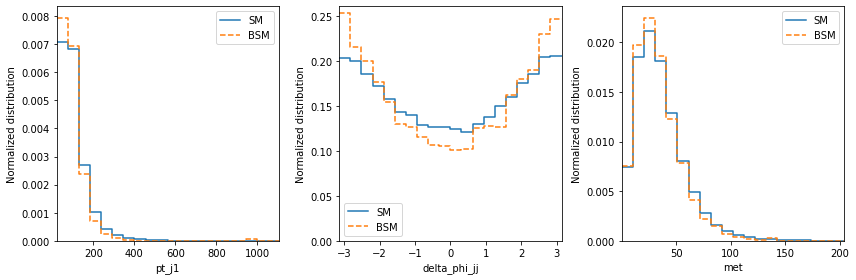

In [37]:
_ = plot_distributions(
    filename='data/lhe_data_gw.h5',
    parameter_points=['sm', np.array([10.,0.])],
    line_labels=['SM', 'BSM'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
    sample_only_from_closest_benchmark=True
)

## 7. Combine and shuffle different samples

To reduce disk usage, you can generate several small event samples with the steps given above, and combine them now. Note that (for now) it is essential that all of them are generated with the same setup, including the same benchmark points / morphing basis!

This is generally good practice even if you use just one sample, since the events might have some inherent ordering (e.g. from sampling from different hypotheses). Later when we split the events into a training and test fraction, such an ordering could cause problems.

In [38]:
combine_and_shuffle(
    ['data/lhe_data_gw.h5'],
    'data/lhe_data_shuffled_gw.h5'
)

15:33 madminer.sampling.co DEBUG   Combining and shuffling samples
15:33 madminer.sampling.co DEBUG   Copying setup from data/lhe_data_gw.h5 to data/lhe_data_shuffled_gw.h5
15:33 madminer.sampling.co DEBUG   Loading samples from file 1 / 1 at data/lhe_data_gw.h5, multiplying weights with k factor 1.0
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [3. 3. 3. ... 3. 3. 3.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [3. 3. 3. ... 3. 3. 3.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [3. 3. 3. ... 3. 3. 3.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [3. 3. 3. ... 3. 3. 3.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [3. 3. 3. ... 3. 3. 3.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [4. 4. 4. ... 4. 4. 4.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [4. 4. 4. ... 4. 4. 4.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [4. 4. 4. ... 4. 4. 4.]
15:33 madminer.sampling.co DEBUG   Sampling benchmarks: [4